In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.size

47040000

In [4]:
X_test.size

7840000

In [5]:
X_train[0].shape

(28, 28)

Hence the image is a 28x28 matrix.
It has 0 value everywhere except for the indexes where the image's part is there.
The values range from (0-255) 

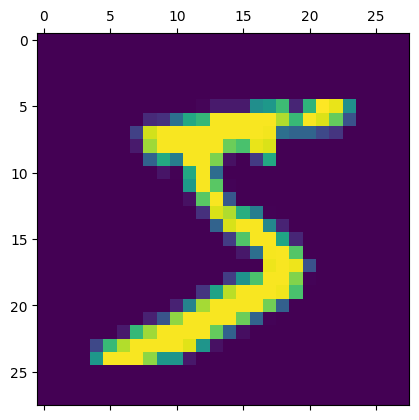

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

np.uint8(5)

Now we need to convert this 28x28 2D array to a flattened 1D array so that the neurons work properly.

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

Scalling the X_train and X_test

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_test_flattened.shape

(10000, 784)

Creating the neural network

Input layer -> sigmoid function -> output layer

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")  ## A callback for TensorBoard
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5, callbacks=[tensorboard_callback])

C:\Users\dhruv\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 947us/step - accuracy: 0.8152 - loss: 0.7788
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.8813 - loss: 0.4558
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.8917 - loss: 0.4028
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.8972 - loss: 0.3763
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9013 - loss: 0.3597


Launching the Tensorboard for better visualization in the notebook itself

In [23]:
%load_ext tensorboard
%tensorboard --logdir ./logs --host=localhost --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 21936), started 0:01:07 ago. (Use '!kill 21936' to kill it.)

We can run it on a localhost also.

Commands are : 

cd "path"

python -m tensorboard.main --logdir=logs/

In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9244 - loss: 0.2765


[0.2765219807624817, 0.9243999719619751]

Model Evaluation

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(0.5, 1.0, 'Confusion Matrix')

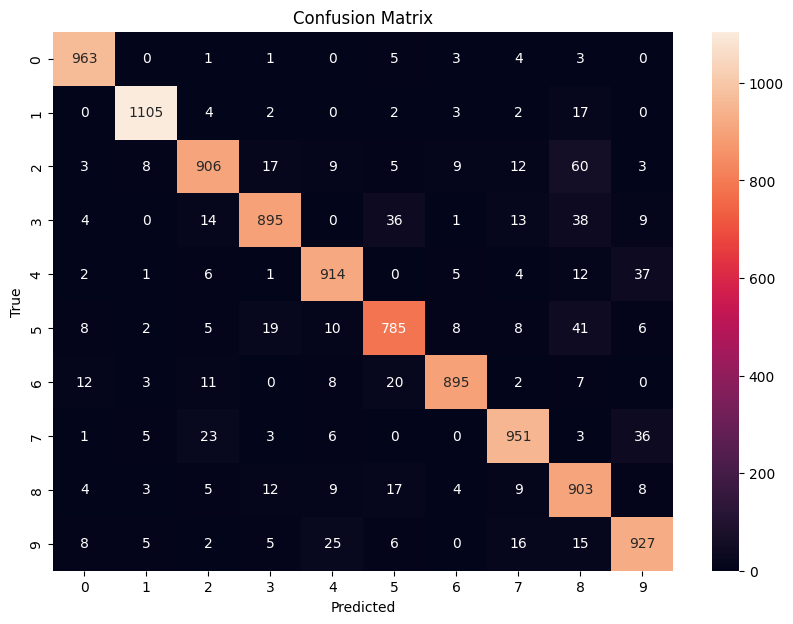

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

Creating a neural network with 1 hidden layer

Input -> hidden layer(with x number of neurons) -> function -> output layer

In [19]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),  #Here 100 is the number of neurons in the hidden layer
    keras.layers.Dense(10, activation='relu'),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\dhruv\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.2039 - loss: 2.2032
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1270 - loss: 2.2387
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1056 - loss: 2.2869
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1017 - loss: 2.2956
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1175 - loss: 2.2644


In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1086 - loss: 2.2782


[2.2781834602355957, 0.10859999805688858]

So we see a clear jump of accuracy from 0.92 to 0.98 when we add a hidden layer to the neural network.